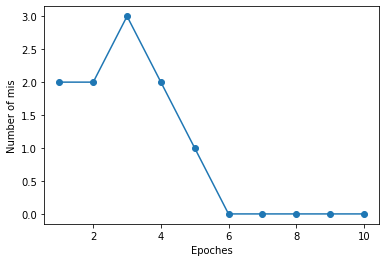

In [96]:
import numpy as np

# 每个样本 更新权重
class Perceptron(object):
    def __init__(self, learning_rate=0.01, iteration=20):
        self.learning_rate = learning_rate
        self.iteration = iteration
    
    def fit(self, X, Y):
#         self.w_ = np.zeros(1+X.shape[1])
        self.w_ = np.zeros( 1 + X.shape[1]) 
        self.errors_ = []
        for _ in range(self.iteration):
            errors = 0
            for xi, target in  zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        #[xv if c else yv for (c,xv,yv) in zip(condition,x,y)]
        return np.where(self.net_input(X) >= 0.0, 1, -1)

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"./iris.data", header = None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

%matplotlib inline
ppn = Perceptron(0.1, 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel("Epoches")
plt.ylabel("Number of mis")
plt.show()

In [109]:
print(ppn.errors_)

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]


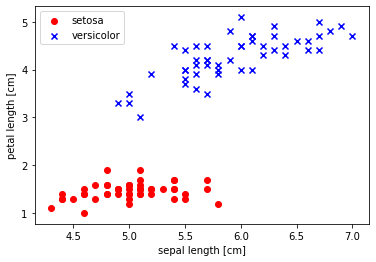

In [107]:
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

## 总结
感知器学习法是对每一个样本的w权值进行更新，而不是$w^{(i)}_j = \eta (y^{(i)}_j - \hat{y^{(i)}_j}) * x^{(i)}_j$，它是$w^{(i)}_j = \eta (y^{(i)}_{(j-1)} - \hat{y^{(i)}_{(j-1)}}) * x^{(i)}_{(j-1)}$再进行每一次迭代

plt.legend是给图像增加一个图例

